<a href="https://colab.research.google.com/github/justinballas/Articles/blob/main/Excel_Python_Article_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to not give up on python (for excel users)**

Programming is becoming more and more popular in business analytics, finance and accounting and is a great supplement or even alternative to excel. However for most, the Python journey is certainly not an easy one. When someone is used to the visual and interactive experience that excel provides, it can be a particularly frustrating transition. It is all too common for people to give up on Python when they are having issues performing tasks that they are already know how to do in Excel, resulting in them never being able to reach the full power that Python has to offer.

After enough time is spend in Python, you may realize that many of the functions used in Excel come from programming concepts, and there have been many features included in Python libraries that are made with Excel veterans in mind.

Here are a few tips that will show you how to simply replicate the Excel functions you may be used to, and a few remedies for the common issues that Excel users tend to have when working in Python.

(Note: this article assumes an understanding of Python basics)

1. Spreadsheets

importing spreadsheets is easy in Python by using open source packages like "Pandas", let's see how it's done by importing pandas and its functions to load an Excel File. I will also import the rest of the libraries I will be using, as well as create our dataframe object.

The Excel file that we will be using has two tabs, the first tab is a cover page, while the second tab contains the data that we need. We can use the Pandas function read_excel to read in the file and specify which tab we want to use. 

To specify the tab that we want to use, just set the sheet_name argument to equal the name of the Excel tab. If this argument is left blank, it will return the first tab of the Excel file. If you want to recieve a dictionary object of all of the tabs, you can set the sheet_name argument to equal None.

In [5]:
#importing pandas as the alias pd
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from glob import glob

#creating the dataframe "df" object from the excel file,
df = pd.read_excel('Financial Sample.xlsx', index_col=0, sheet_name='Sales Data')

#displaying the first five rows of the dataframe
df.head(5)

,Order ID,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date
SaleID,,,,,,,,
1,700,Government,Canada,Carretera,1618.5,10,20,2014-01-01
2,699,Government,Germany,Carretera,1321.0,10,20,2014-01-01
3,698,Midmarket,France,Carretera,2178.0,10,15,2014-06-01
4,697,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01
5,696,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01


A common issue that most people with an Excel background experience is the fact that they are unable to see the data they are working with. Eventually, most people find this to be unnecessary, especially when dealing with larger data sets. However, there are still several very simple ways to sidestep this issue.

One way to do this is to adjust the built-in Pandas option using the pandas set_option function.

In [ ]:
pd.set_option('display.max_rows', None)

This will remove the maximum rows limit that Pandas automatically sets. On particularly large datasets, this is typically not advised. But if the data is reasonably sized this can be a good option. You may also set the second argument to a number (50, 100, etc.) to be your maximum row display.

Another and much more dynamic way to to give more visual feedback when using python is to use the google colab data table extension. This extension allows you to dynamically sort and filter rows, as well as change the amount of rows displayed. Note that this extension is only available while in google colab.

In [ ]:
%load_ext google.colab.data_table
df

In [ ]:
%unload_ext google.colab.data_table

2. Working with columns

In python you can easily create calculated columns. We can do this by simply applying mathematical operations between columns.



1.   COGS (Units Sold * Manufacturing price)
2.   Gross Profit (Units Sold * Share Price)
3.   Net Income (Gross Profit - COGS)
4.   Net Income Less Discounts (Net Income - Discounts)



In [ ]:
#make sure to set the axis argument to 1 to calculate columns as opposed to rows.
df['COGS'] = df['Units Sold'] * df['Manufacturing Price']

df['Gross Profit'] = df['Units Sold'] * df['Sale Price']

df['Net Income'] = df['Gross Profit'] - df['COGS']

df['Margin'] = df['Net Income'] / df['Gross Profit']

df.head()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,Gross Profit,Net Income,Margin
SaleID,,,,,,,,,,,
1,Government,Canada,Carretera,1618.5,10,20,2014-01-01,16185.0,32370.0,16185.0,0.500000
2,Government,Germany,Carretera,1321.0,10,20,2014-01-01,13210.0,26420.0,13210.0,0.500000
3,Midmarket,France,Carretera,2178.0,10,15,2014-06-01,21780.0,32670.0,10890.0,0.333333
4,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01,8880.0,13320.0,4440.0,0.333333
5,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01,24700.0,37050.0,12350.0,0.333333


To remove columns, use the Pandas drop function. You can specify a single column or list of columns to drop. You can also use the same function to delete rows by index column by setting the axis argument to 0, or by leaving it blank since axis=0 is the default argument.

In [ ]:
df.drop(['COGS', 'Gross Profit', 'Net Income', 'Margin'], axis=1, inplace=True)

Let's add those columns back in an even cooler way. When adding a large group of columns in a pinch, we can use the Pandas assign function. the assign function allows us to create multiple calculated columns within one function by utilizing lambda functions. Lambda functions may look scary, but they are actually incredibly simple. Lambda will create a temporary function by assigning a variable for use within the function, in this case x. it is a faster way to create user defined functions for a quick one off use case.

Pros and Cons of pd.assign()

Pro:

*   You can reference columns that you create in previous steps.

Con:

* you can not have spaces in your column names.



In [6]:
df = df.assign(COGS=lambda x: x['Units Sold'] * x['Manufacturing Price'],
                                           GrossProfit=lambda x: x['Units Sold'] * x['Sale Price'],
                                           NetIncome=lambda x: x['GrossProfit'] - x['COGS'],
                                           Margin=lambda x: x['NetIncome'] / x['GrossProfit'])

df

,Order ID,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,GrossProfit,NetIncome,Margin
SaleID,,,,,,,,,,,,
1,700,Government,Canada,Carretera,1618.5,10,20,2014-01-01,16185.0,32370.0,16185.0,0.500000
2,699,Government,Germany,Carretera,1321.0,10,20,2014-01-01,13210.0,26420.0,13210.0,0.500000
3,698,Midmarket,France,Carretera,2178.0,10,15,2014-06-01,21780.0,32670.0,10890.0,0.333333
4,697,Midmarket,Germany,Carretera,888.0,10,15,2014-06-01,8880.0,13320.0,4440.0,0.333333
5,696,Midmarket,Mexico,Carretera,2470.0,10,15,2014-06-01,24700.0,37050.0,12350.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
696,5,Small Business,France,Amarilla,2475.0,250,300,2014-03-01,618750.0,742500.0,123750.0,0.166667
697,4,Small Business,Mexico,Amarilla,546.0,250,300,2014-10-01,136500.0,163800.0,27300.0,0.166667
698,3,Government,Mexico,Montana,1368.0,5,7,2014-02-01,6840.0,9576.0,2736.0,0.285714


Python also has a datetime module that takes the place of excel functions like Year(), Month() and Today(). let's use the datetime module to create a month column from the date column. the strftime function allows us to format dates. Check out https://strftime.org/ for more date format code examples. In our case, %B returns the month.

In [7]:
##also can do this without apply function
df['Month'] = df['Date'].dt.strftime('%B')

In [8]:
df['Month'] = df['Date'].apply(lambda x: dt.datetime.strftime(x, '%B'))

let's take a look at what we did

In [9]:
df['Month']

SaleID
1       January
2       January
3          June
4          June
5          June
         ...   
696       March
697     October
698    February
699       April
700         May
Name: Month, Length: 700, dtype: object

In some cases, we may wish to format our columns. Manufacturing price, sale price, COGS Gross Profit and Net income should be in currency format, and Margin should be in percent format. For this we can use the style attribute of the Pandas dataframe and insert a dictionary of column/format pairs. 

In [ ]:
format_dict = {'Units Sold':'{:,.0f}','Manufacturing price': '${:,.0f}', 'Sale Price': '${:,.0f}', "Date":'{:%Y-%m-%d}', 'COGS':'${:,.0f}',
               'GrossProfit':'${:,.0f}', 'NetIncome':'${:,.0f}', 'Margin':'{:.2%}'}

df.style.format(format_dict)

Unfortunately this cannot be permanently applied to the dataframe, you must always add style.format to the end of your dataframe output if you want the values to be formatted in the ways that you specify.

2. Sort and Filter

As shown earlier, you can use the google colab data table extension to dynamically sort and filter data. However, if you are not using google colab, or you need to sort and filter data for use in functions, outputs, or anything that goes beyond a simple eye test, pandas sort and filter functions will be more useful. Let's sort the data by the "Total" column in descending order. We can do this by using the pandas sort_values function with the column name that we want to sort by as the argument. The default order is ascending, if you want descending order, specify the argument "ascending=False". Set the inplace argument to True if you want this change to be permanant.

In [ ]:
df.sort_values(by='NetIncome', ascending=False , inplace=True)
df

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,GrossProfit,NetIncome,Margin
SaleID,,,,,,,,,,,
193,Government,United States of America,Paseo,3450.0,260,350,2014-07-01,897000.0,1207500.0,310500.0,0.257143
141,Government,Germany,Amarilla,2966.0,260,350,2013-10-01,771160.0,1038100.0,266940.0,0.257143
125,Government,Germany,Velo,2966.0,260,350,2013-10-01,771160.0,1038100.0,266940.0,0.257143
134,Government,Germany,VTT,2877.0,260,350,2014-10-01,748020.0,1006950.0,258930.0,0.257143
126,Government,Germany,Velo,2877.0,260,350,2014-10-01,748020.0,1006950.0,258930.0,0.257143
...,...,...,...,...,...,...,...,...,...,...,...
623,Government,Germany,VTT,280.0,5,7,2014-12-01,1400.0,1960.0,560.0,0.285714
616,Government,Germany,Carretera,280.0,5,7,2014-12-01,1400.0,1960.0,560.0,0.285714
279,Government,United States of America,Carretera,263.0,5,7,2013-11-01,1315.0,1841.0,526.0,0.285714


Now let's filter for only the Amarilla product using a logical filter on the dataframe.



In [ ]:
df[df['Product'] == 'Amarilla']

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,GrossProfit,NetIncome,Margin,Month
SaleID,,,,,,,,,,,,
141,Government,Germany,Amarilla,2966.0,260,350,2013-10-01,771160.0,1038100.0,266940.0,0.257143,October
354,Government,France,Amarilla,2876.0,260,350,2014-09-01,747760.0,1006600.0,258840.0,0.257143,September
46,Government,France,Amarilla,2750.0,260,350,2014-02-01,715000.0,962500.0,247500.0,0.257143,February
487,Government,Canada,Amarilla,2240.0,260,350,2014-02-01,582400.0,784000.0,201600.0,0.257143,February
304,Government,France,Amarilla,2076.0,260,350,2013-10-01,539760.0,726600.0,186840.0,0.257143,October
437,Government,United States of America,Amarilla,2071.0,260,350,2014-09-01,538460.0,724850.0,186390.0,0.257143,September
211,Government,Germany,Amarilla,1907.0,260,350,2014-09-01,495820.0,667450.0,171630.0,0.257143,September
209,Government,Mexico,Amarilla,1865.0,260,350,2014-02-01,484900.0,652750.0,167850.0,0.257143,February
213,Government,Canada,Amarilla,1778.0,260,350,2013-12-01,462280.0,622300.0,160020.0,0.257143,December


If you have a particularly long filter, it may be useful to set it to its own variable and then apply that to the dataframe.

In [ ]:
#creating a variable with our filter
filt = (df['Manufacturing Price']  > 100) & (df['Manufacturing Price'] < 150) & df['Country'].str.startswith('C')

#returning a dataframe with our filter applied
df[filt].sort_values(by='NetIncome', ascending=False)

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Date,COGS,GrossProfit,NetIncome,Margin
SaleID,,,,,,,,,,,
693,Enterprise,Canada,VTT,2954.0,120,125,2013-11-01,354480.0,369250.0,14770.0,0.04
135,Enterprise,Canada,VTT,2729.0,120,125,2014-12-01,327480.0,341125.0,13645.0,0.04
119,Enterprise,Canada,Paseo,2729.0,120,125,2014-12-01,327480.0,341125.0,13645.0,0.04
12,Enterprise,Canada,Montana,2665.5,120,125,2014-07-01,319860.0,333187.5,13327.5,0.04
484,Enterprise,Canada,VTT,2529.0,120,125,2014-11-01,303480.0,316125.0,12645.0,0.04
538,Enterprise,Canada,Carretera,2416.0,120,125,2013-09-01,289920.0,302000.0,12080.0,0.04
166,Enterprise,Canada,Velo,2009.0,120,125,2014-10-01,241080.0,251125.0,10045.0,0.04
162,Enterprise,Canada,Paseo,2009.0,120,125,2014-10-01,241080.0,251125.0,10045.0,0.04
476,Enterprise,Canada,Velo,1916.0,120,125,2013-12-01,229920.0,239500.0,9580.0,0.04


4. Working with Rows

Working with columns is easy and intuitive in Python, however, working with rows can be a bit tricky. If we want to use different row values in our column calculations, we can use the Pandas shift function.

In [44]:
#creating a new dataframe that only contains the date and units sold for the Amarilla product
df2 = df[df['Product']=='Amarilla'][['Date', 'Units Sold']].sort_values(by='Date')


#using the shift function to select the value in the previous row. we are setting the period
#argument to equal 1 since we are going back one row.
df2['Prev Units Sold'] = df2['Units Sold'].shift(periods=1)

# calculating percent change
df2['Change'] = (df2['Units Sold'] - df2['Prev Units Sold']) / df2['Prev Units Sold']
df2

,Date,Units Sold,Prev Units Sold,Change
SaleID,,,,
576,2013-09-01,2761.0,NaN,NaN
533,2013-09-01,947.0,2761.0,-0.657008
355,2013-09-01,994.0,947.0,0.049630
97,2013-09-01,1989.0,994.0,1.001006
271,2013-10-01,1228.0,1989.0,-0.382604
...,...,...,...,...
357,2014-12-01,1372.0,711.0,0.929677
493,2014-12-01,2072.0,1372.0,0.510204
494,2014-12-01,853.0,2072.0,-0.588320


We have successfully used the previous row value to calculate the percent change for the current row. However, this is even easier if you just use the Pandas percent_change function.

In [45]:
df2['Pandas Change'] = df2['Units Sold'].pct_change()
df2

,Date,Units Sold,Prev Units Sold,Change,Pandas Change
SaleID,,,,,
576,2013-09-01,2761.0,NaN,NaN,NaN
533,2013-09-01,947.0,2761.0,-0.657008,-0.657008
355,2013-09-01,994.0,947.0,0.049630,0.049630
97,2013-09-01,1989.0,994.0,1.001006,1.001006
271,2013-10-01,1228.0,1989.0,-0.382604,-0.382604
...,...,...,...,...,...
357,2014-12-01,1372.0,711.0,0.929677,0.929677
493,2014-12-01,2072.0,1372.0,0.510204,0.510204
494,2014-12-01,853.0,2072.0,-0.588320,-0.588320


5. SUMIF, AVERAGEIF, COUNTIF, etc.

These functions can all be easily replicated in Python by applying a filter on our dataframe and then selecing a column in our filtered dataframe to perform an operation on.

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Manufacturing Price'].sum()

25000

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Manufacturing Price'].mean()

250.0

In [ ]:
filt = df['Segment']=='Small Business'
df[filt]['Segment'].count()

100

SUMIF, AVERAGEIF, COUNTIF, are simply ways to perform aggregate mathematical operations on sections of data that fit certain criteria. Python has tools that can do this and more, you may even find this more intuitive than than the Excel counterparts. lets return the sum and average of gross profit using our more complicated filter from earlier.

In [ ]:
filt = (df['Manufacturing Price']  > 100) & (df['Manufacturing Price'] < 150) & df['Country'].str.startswith('C')

df[filt]['GrossProfit'].agg({'sum': sum, 'mean': np.mean})

sum     4259375.00
mean     212968.75
Name: GrossProfit, dtype: float64

In [ ]:
df[filt]['GrossProfit'].describe()

count        20.000000
mean     212968.750000
std      103923.682501
min       43125.000000
25%      118093.750000
50%      214562.500000
75%      305531.250000
max      369250.000000
Name: GrossProfit, dtype: float64

6. Lookups (LOOKUPS, INDEX/MATCH, INDEX)

You may find that lookups in python are more intuative than in excel. To replicate lookups, we will use the Pandas loc (locate) function. The loc function is one of the most basic functions in pandas and allows you to select an item by column and row indexers. Let's find the product that was sold for the SaleID "453".

In [ ]:
df.loc[453, 'Product']

'Amarilla'

Looks like the product from this sale was Amarilla, how insightful! the pandas loc function is capable of giving you the same output as vlookup, hlookup, xlookup, and index/match.


You can also use a filter within the loc function.

In [ ]:
df.loc[df.index >= 600, 'Product']

SaleID
600         Velo
601         Velo
602         Velo
603         Velo
604         Velo
605         Velo
606         Velo
607          VTT
608          VTT
609     Amarilla
610     Amarilla
611     Amarilla
612     Amarilla
613    Carretera
614    Carretera
615    Carretera
616    Carretera
617      Montana
618      Montana
619        Paseo
620        Paseo
621        Paseo
622        Paseo
623          VTT
624     Amarilla
625     Amarilla
626    Carretera
627    Carretera
628    Carretera
629    Carretera
630    Carretera
631    Carretera
632    Carretera
633      Montana
634      Montana
635      Montana
636      Montana
637      Montana
638      Montana
639        Paseo
640        Paseo
641        Paseo
642        Paseo
643        Paseo
644        Paseo
645        Paseo
646        Paseo
647        Paseo
648         Velo
649         Velo
650         Velo
651         Velo
652         Velo
653          VTT
654          VTT
655          VTT
656          VTT
657          VTT
658    

Now let's try to replicate the excel INDEX function to find the value at the coordinates (5, 2). To do this, we can use the Pandas iloc (integer locate) function. Just remember that in python indexes start with zero and not 1.

In [ ]:
df.iloc[5,2]

'Carretera'

I know what you're thinking, this is hardly helpful. Usually you have a list of lookup values, right? Well you can do that in python, too. Just initialize a list of values for our loc function. It's just like dragging down a formula in Excel.



In [ ]:
sales_list = [520, 342, 20, 406, 399, 49]

df.loc[sales_list, ['Product', 'Country','NetIncome']]

,Product,Country,NetIncome
SaleID,,,
520,Paseo,France,12205.0
342,Paseo,Germany,4250.0
20,Paseo,Germany,90540.0
406,Montana,Canada,190125.0
399,Amarilla,Germany,15200.0
49,Amarilla,France,18990.0


Now let's attempt a proper VLOOKUP. We can do this by selecting specific index values and all columns with the loc function, and then chaining it together with the iloc function so we can use a numerical index for the column, just remember that Python indexes begin with 0 as opposed to Excel which begins at 1.

In [ ]:
df.loc[sales_list,:].iloc[:,2]

SaleID
520     France
342    Germany
20     Germany
406     Canada
399    Germany
49      France
Name: Country, dtype: object

You can also insert a list into the iloc function, just like you can the loc function.

In [ ]:
df.loc[sales_list,:].iloc[:,[3,2,10]]

,Product,Country,NetIncome
SaleID,,,
520,Paseo,France,12205.0
342,Paseo,Germany,4250.0
20,Paseo,Germany,90540.0
406,Montana,Canada,190125.0
399,Amarilla,Germany,15200.0
49,Amarilla,France,18990.0


If you want to specify a lookup column that is not the index of our dataframe, instead of loc, we can use a filter to to select a lookup column and our lookup criteria, then use the iloc function to select the numerical index of the column we want to return.

In [ ]:
df[df['OrderID'] == 15].iloc[:,2]

SaleID
686    United States of America
Name: Country, dtype: object

Finally, if we have a list of items with a lookup column that is not the index of our dataframe, we can utilize the isin function.

In [ ]:
order_list = [15, 450, 245, 600, 553, 700]

df[df['OrderID'].isin(order_list)].iloc[:,[2,1,9]]

,Country,Segment,GrossProfit
SaleID,,,
1,Canada,Government,32370.0
101,Germany,Small Business,64200.0
148,United States of America,Channel Partners,23364.0
251,France,Government,14952.0
456,United States of America,Channel Partners,4632.0
686,United States of America,Small Business,772200.0


5. Pivot Tables

Now this is where it starts getting really fun. Excel Pivot tables allow you to quickly perform aggregate calculations on your data. Python also has a Pivot Table function.

Let's see how many units were ordered for each product using the pivot_table function.

In [ ]:
df.pivot_table(index='Product', values='Units Sold', aggfunc='sum').style.format('{:.0f}')

,Units Sold
Product,
Amarilla,155315
Carretera,146846
Montana,154198
Paseo,338240
VTT,168783
Velo,162424


What if we want to perform multiple calculations on the data? The aggfunc argument where we specify the type of calculation we want can also take in a list of values. let's include the sum, mean, min, max, and standard deviation of units ordered by region.

In [ ]:
func_list = ['sum','mean', 'min', 'max', 'std']

df.pivot_table(index='Country', values='Units Sold', aggfunc=func_list).style.format('{:.0f}')

,sum,mean,min,max,std
,Units Sold,Units Sold,Units Sold,Units Sold,Units Sold
Country,,,,,
Canada,247428,1767,200,4251,874
France,240931,1721,293,4244,839
Germany,201494,1439,214,4220,828
Mexico,203325,1452,245,2993,778
United States of America,232628,1662,263,4492,965


Now let's specify the columns argument. Lets add Country to the columns argument so we can break down the units sold by product and by country.

In [ ]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', aggfunc='sum').style.format('{:.0f}')

Country,Canada,France,Germany,Mexico,United States of America
Product,,,,,
Amarilla,29232,31603,30614,28396,35470
Carretera,34804,34056,24944,27224,25818
Montana,31488,31282,28061,31754,31612
Paseo,78192,71606,55694,63282,69466
VTT,41248,35774,31131,26129,34500
Velo,32464,36610,31050,26540,35761


I know what you're thinking, that does look a lot like an Excel pivot table, but where's the grand total? To add the grand total, specify the margins argument to equal True, and if you want, you can even set the margins_name argument to 'Grand Total'.

In [ ]:
df.pivot_table(index='Product', columns='Country',values='Units Sold', aggfunc='sum',
               margins=True, margins_name='Grand Total').style.format('{:.0f}')

Country,Canada,France,Germany,Mexico,United States of America,Grand Total
Product,,,,,,
Amarilla,29232,31603,30614,28396,35470,155315
Carretera,34804,34056,24944,27224,25818,146846
Montana,31488,31282,28061,31754,31612,154198
Paseo,78192,71606,55694,63282,69466,338240
VTT,41248,35774,31131,26129,34500,168783
Velo,32464,36610,31050,26540,35761,162424
Grand Total,247428,240931,201494,203325,232628,1125806


Now, what if we want to break out our data even further? We can do this by creating a multi-index pivot table by passing a list of columns into the index argument instead of a single column.

In [ ]:
df.pivot_table(index=['Product', 'Segment'], columns='Country', values='Units Sold',
               aggfunc='sum').style.format('{:.0f}')

6. Charts

Let's wrap this up by making a pviot chart showing number of units sold by product and country. To make this chart we will use the Pandas built in graphing capabilities based on the matplotlib graphing library. Matplotlib is only one of many graphing libraries that Python has to offer. Check out Seaborn, Plotly, and if you've used R in the past, you may be happy to learn that you can even use ggplot in python.

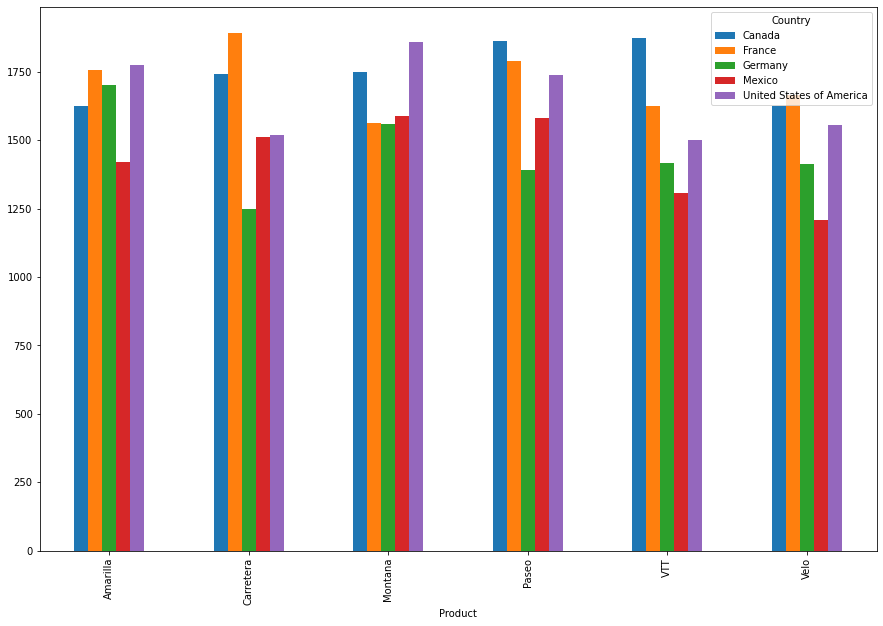

In [96]:
df.pivot_table(index='Product', columns='Country', values='Units Sold', 
               aggfunc='mean').plot(kind='bar', figsize = [15,10]);

Let's use some of the things we've learned to make a more complicated pivot chart that will give us deeper look at out data. Let's see how many how many unites were sold bo country for each product/segment pairing during the year 2014, sorted in descending order. 

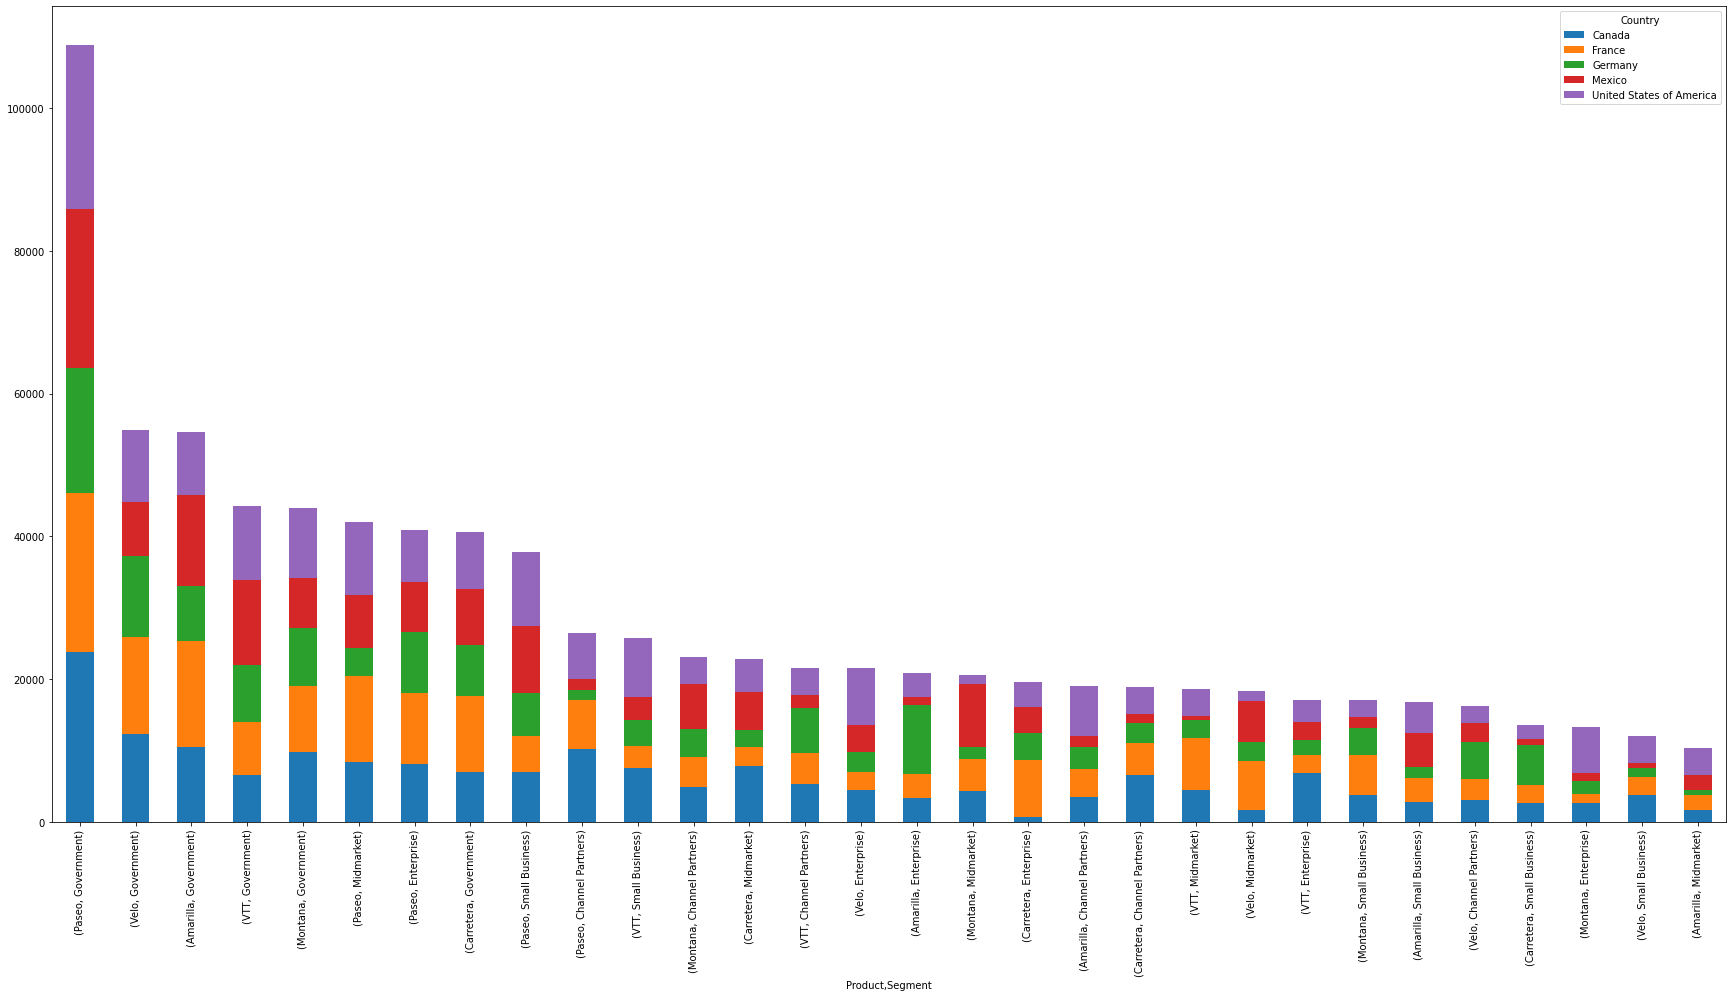

In [120]:
pivot_table = df[df['Date'].dt.year==2014].pivot_table(index=['Product', 'Segment'], columns='Country', values='Units Sold',
               aggfunc='sum', margins=True).sort_values(by='All', ascending=False)

#.plot(kind='bar', stacked=True, figsize=[30,15])
pivot_table.iloc[1:,:5].plot(kind='bar', stacked=True, figsize=[30,15]);

To round it all out, This project will automate the aggregation of data into a a multiple sheet excel report and give you a quick glimpse of the powerful and useful python library "xlsxwriter".

In [ ]:
!pip install xlsxwriter

In [ ]:
#importing pandas as the alias pd
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
%matplotlib inline

#creating the dataframe "df" object from the csv file
df = pd.read_excel('Financial Sample.xlsx', index_col=0)

#adding calculated columns
df = df.assign(COGS=lambda x: x['Units Sold'] * x['Manufacturing Price'],
                                           GrossProfit=lambda x: x['Units Sold'] * x['Sale Price'],
                                           NetIncome=lambda x: x['GrossProfit'] - x['COGS'],
                                           Margin=lambda x: x['NetIncome'] / x['GrossProfit'])



xlwriter = pd.ExcelWriter('Sales_Report_{}.xlsx'.format(dt.date.today()), engine='xlsxwriter')

agg_list = ['Segment', 'Country', 'Product', 'Month']

for col in agg_list:
  temp_pivot = df.pivot_table(index=col, values='Units Sold', aggfunc='sum')
  pivot_chart = temp_pivot.plot(kind="bar")
  temp_pivot.to_excel(xlwriter, sheet_name='{}'.format(col))
  plt.tight_layout()
  plt.savefig('{}.png'.format(col))
  worksheet=xlwriter.sheets['{}'.format(col)]
  worksheet.insert_image('D1','{}.png'.format(col))
  worksheet.set_column('B:B', 10)
  worksheet.set_column('A:A', 20)

xlwriter.save()

xlwriter.close()